Цель проекта

Анализ рекламной кампании для оценки ее эффективности и изучения ключевых продуктовых метрик на основе представленных данных.

Задачи проекта:
	1.	Провести первичный анализ данных: проверить структуру данных, количество строк и столбцов, наличие пропущенных значений и уникальные значения ключевых категорий.
	2.	Исследовать распределение числа показов (Impressions) для каждой рекламы, применив логарифмическое преобразование для удобства визуализации.
	3.	Рассчитать и проанализировать метрику CTR (Click-Through Rate) – отношение числа кликов к числу показов. Исследовать распределение CTR и описательные статистики.
	4.	Выполнить анализ CTR с разбивкой по рекламным кампаниям.
	5.	Рассчитать CPC (стоимость клика) и изучить его распределение с использованием мер центральной тенденции и изменчивости.
	6.	Визуализировать CPC с разбивкой по полу пользователей.
	7.	Посчитать конверсию из клика в покупку и проанализировать ее значения.

Ожидаемые результаты:

		Получение наглядных визуализаций распределений метрик и выявление ключевых тенденций.
        
		Определение наиболее эффективных рекламных кампаний и сегментов пользователей.
        
		Рекомендации по оптимизации рекламной стратегии на основе полученных данных.

In [3]:
# Импортируем необходимые библиотеки для анализа данных и визуализацииimport numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr as ss

%matplotlib inline

In [4]:
# Загружаем данные из CSV-файла
df = pd.read_csv('./conversion.csv')

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df.shape

(1143, 11)

In [8]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [9]:
df['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

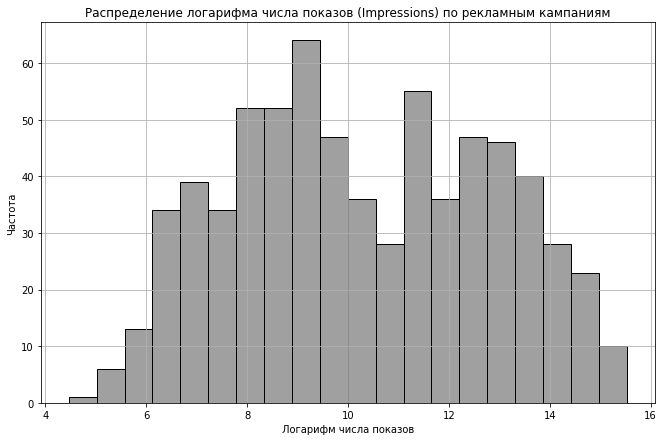

In [10]:
# Группируем данные по кампаниям Facebook ('fb_campaign_id') и считаем общее
# количество показов (Impressions)
impressions_per_campaign = df.groupby('fb_campaign_id')['Impressions'].sum()

# Логарифмируем значения числа показов для уменьшения разброса и улучшения визуализации
log_impressions = np.log(impressions_per_campaign)

# Строим гистограмму распределения логарифма числа показов по рекламным кампаниям
plt.figure(figsize=(11, 7))
sns.histplot(log_impressions, kde=False, bins=20, color='gray')  # Используем гистограмму
plt.title('Распределение логарифма числа показов (Impressions) по рекламным кампаниям')
plt.xlabel('Логарифм числа показов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

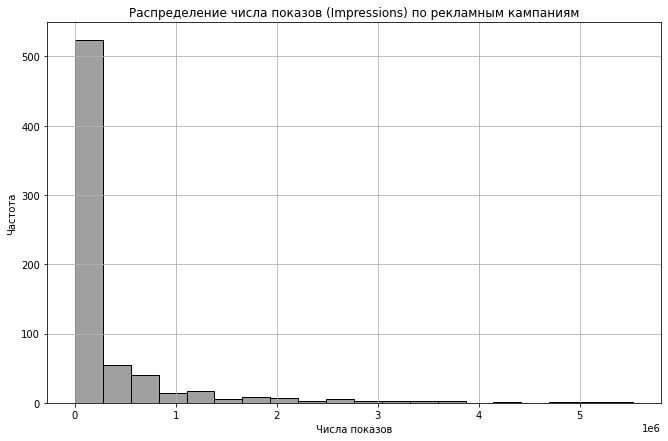

In [11]:
# Распределение до логарифмирование
plt.figure(figsize=(11, 7))
sns.histplot(impressions_per_campaign, kde=False, bins=20, color='gray')  # Используем гистограмму
plt.title('Распределение числа показов (Impressions) по рекламным кампаниям')
plt.xlabel('Числа показов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Рассчитать и проанализировать метрику CTR (Click-Through Rate) — показатель кликабельности, который помогает оценить, насколько рекламное объявление привлекает внимание пользователей

In [12]:
# Рассчитываем CTR (Click-Through Rate) как отношение кликов к числу показов

df['CTR'] = df['Clicks'] / df['Impressions']

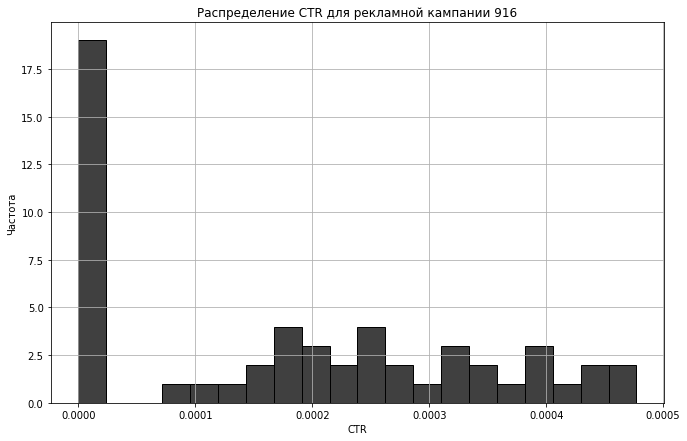

In [13]:
# Фильтруем данные для рекламной кампании с идентификатором 916
campaign_916_data = df[df['xyz_campaign_id'] == 916]

# Строим гистограмму распределения CTR для кампании 916
plt.figure(figsize = (11, 7))  # Устанавливаем размер графика
sns.histplot(data = campaign_916_data, x = campaign_916_data['CTR'], bins = 20, color = "black")  # Гистограмма
plt.title('Распределение CTR для рекламной кампании 916')  # Заголовок графика
plt.xlabel('CTR')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.grid(True)  # Включаем сетку
plt.show()

Краткий вывод по графику CTR:

Большинство значений CTR близко к нулю, что указывает на низкую кликабельность объявлений. Небольшая группа объявлений имеет высокий CTR, выделяясь на фоне остальных. Распределение асимметрично и смещено влево.

In [14]:
# Находим индекс строки с максимальным CTR, устанавливая 'ad_id' в качестве индекса
df.set_index('ad_id')['CTR'].idxmax()

738637

Рассчитываем стоимость за клик (CPC) Cost-Per-Click — это стоимость одного клика.

In [15]:
# CPC (cost-per-click) – стоимость одного клика пользователя по объявлению
df['CPC'] = df['Spent'] / df['Clicks']

# Округляем среднее значение CPC до двух знаков после запятой
round(ss(df['CPC'], nan_policy='omit'), 2)

0.25

Вычисляем меры изменчивости для CTR

In [16]:
# Находим первый (Q1) и третий (Q3) квартили CTR
Q1 = df['CTR'].quantile(0.25)  # Первый квартиль (25%)
Q3 = df['CTR'].quantile(0.75)  # Третий квартиль (75%)

# Вычисляем межквартильный размах (IQR) для CTR
IQR = Q3 - Q1
IQR

0.0001334143888399813

 Межквартильный размах (IQR):
 
		IQR (межквартильный размах): Рассчитанный IQR = 0.000133.
		Это значение показывает очень узкий диапазон значений CTR между первым (Q1) и третьим (Q3) квартилями.
		Основные значения CTR сконцентрированы в узком интервале, а небольшая группа данных сильно выбивается за пределы этого интервала, что говорит о низкой вариативности для большинства объявлений и высоких выбросах.

 Визуализируем распределение CTR

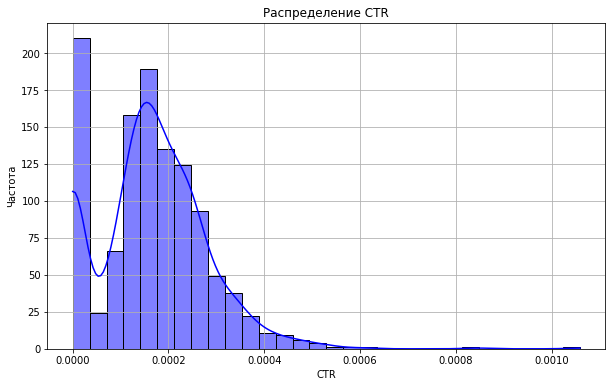

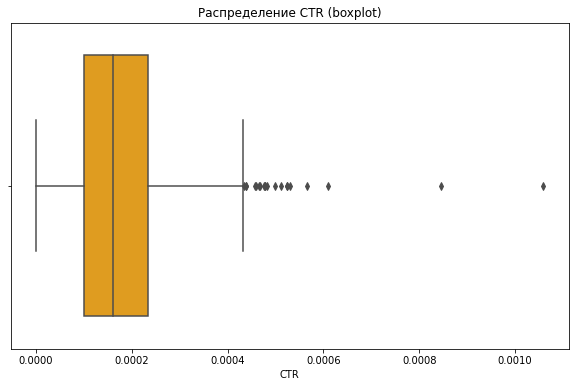

In [17]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['CTR'].dropna(), bins=30, kde=True, color='blue')
plt.title('Распределение CTR')
plt.xlabel('CTR')
plt.ylabel('Частота')
plt.grid(True)
plt.show()



# Коробчатая диаграмма (boxplot)
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['CTR'].dropna(), color = 'orange')
plt.title('Распределение CTR (boxplot)')
plt.show()

Выводы по графикам и IQR:

1. Гистограмма и boxplot распределения CTR:

	•	Гистограмма: Большинство значений CTR (Click-Through Rate) сосредоточено близко к нулю, что указывает на низкую кликабельность большинства объявлений.
    
	•	Boxplot:

	•	Распределение CTR асимметрично и смещено влево. Это подтверждает наличие большого количества низких значений и несколько выбросов (outliers) справа.
	•	Небольшая группа объявлений имеет очень высокий CTR по сравнению с остальными, что отражается в длинных «усах» и выбросах на boxplot.

In [18]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [31]:
print(df.query("gender == 'M'")['CPC'].std())
print(df.query("gender == 'F'")['CPC'].std())

0.6693706420966038
0.5497069693780606


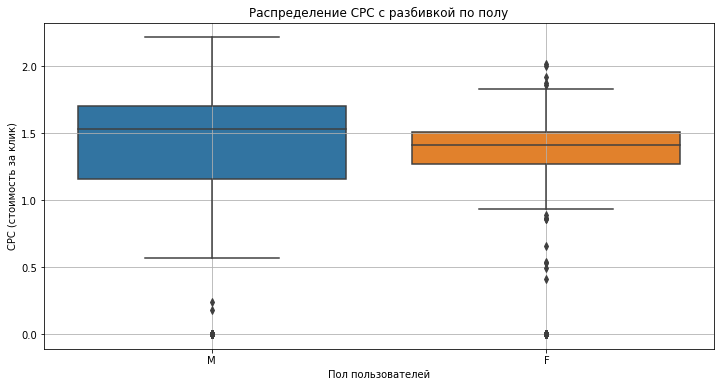

In [19]:
# Шаг 1: Создаем новую колонку CPC (стоимость за клик)
df['CPC'] = df['Spent'] / df['Clicks']

# Шаг 2: Проверяем наличие пропущенных значений и заменяем их на 0
df['CPC'] = df['CPC'].fillna(0)

# Шаг 3: Визуализируем распределение CPC с разбивкой по полу
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'gender', y = 'CPC', data = df)
plt.title('Распределение CPC с разбивкой по полу')
plt.xlabel('Пол пользователей')
plt.ylabel('CPC (стоимость за клик)')
plt.grid(True)
plt.show()

Вывод по графику:
	1.	Общая картина:
		CPC (стоимость за клик) для мужчин (M) имеет больший разброс по сравнению с женщинами (F).
		Медиана CPC для мужчин и женщин примерно на одном уровне (около 1.5), однако у мужчин наблюдается больше выбросов как в сторону минимальных, так и максимальных значений.
	
    2.	Мужчины (M):
		Более широкий разброс значений CPC.
		Присутствуют выбросы ниже 0.5 и выше 2.0.
	
    3.	Женщины (F):
		CPC распределено более равномерно, выбросы наблюдаются в нижней части диапазона.
		Верхняя граница чуть ниже, чем у мужчин, что указывает на меньшую изменчивость.

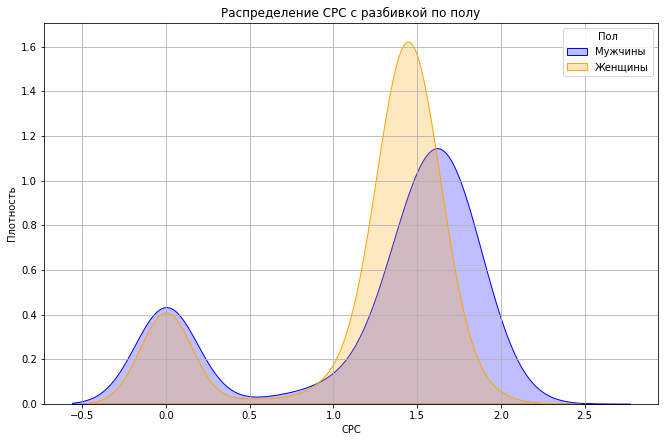

In [20]:
# Плотность распределения CPC (стоимости за клик) с разбивкой по полу

# Создаём график с двумя распределениями
plt.figure(figsize=(11, 7))  # Устанавливаем размер графика

# Плотность CPC для мужчин
sns.kdeplot(
    df.query("gender == 'M'")['CPC'].dropna(),  # Фильтруем данные по полу 'M' (мужчины) и убираем пропуски
    label = 'Мужчины',  # Подпись для легенды
    shade = True,  # Закрашиваем под кривой
    color = 'blue'  # Цвет для мужчин
)

# Плотность CPC для женщин
sns.kdeplot(
    df.query("gender == 'F'")['CPC'].dropna(),  # Фильтруем данные по полу 'F' (женщины) и убираем пропуски
    label = 'Женщины',  # Подпись для легенды
    shade = True,  # Закрашиваем под кривой
    color = 'orange'  # Цвет для женщин
)

# Оформление графика
plt.title('Распределение CPC с разбивкой по полу')  # Заголовок графика
plt.xlabel('CPC')  # Подпись оси X
plt.ylabel('Плотность')  # Подпись оси Y
plt.legend(title = 'Пол')  # Легенда с заголовком "Пол"
plt.grid(True)  # Включаем сетку для удобства чтения графика
plt.show()  # Показываем график

In [21]:
# CR показывает долю пользователей, совершивших покупку,
# среди тех, кто кликнул по рекламе.

# Шаг 1: Добавляем столбец CR (конверсия из кликов в покупки)

df['CR'] = (df['Approved_Conversion'] / df['Clicks']) * 100

# Проверяем первые строки с новым столбцом
print(df[['ad_id', 'Clicks', 'Approved_Conversion', 'CR']].head())

    ad_id  Clicks  Approved_Conversion     CR
0  708746       1                    1  100.0
1  708749       2                    0    0.0
2  708771       0                    0    NaN
3  708815       1                    0    0.0
4  708818       1                    1  100.0


In [22]:
# Шаг 2: Рассчитываем описательные статистики
cr_stats = df['CR'].describe()
print("\nОписательные статистики для CR:")
print(cr_stats)


Описательные статистики для CR:
count    1007.000000
mean             inf
std              NaN
min         0.000000
25%         0.000000
50%         1.801802
75%        10.000000
max              inf
Name: CR, dtype: float64


	CR для некоторых объявлений равен 100%: это значит, что каждый клик по объявлению привел к покупке.
    CR = NaN: нет кликов по объявлению, поэтому конверсия не рассчитывается

Рассчитываем меры центральной тенденции и дисперсии для CPC по группам пола:

In [23]:
# Группировка данных по полу и расчет мер центральной тенденции и дисперсии
cpc_stats = df.groupby('gender')['CPC'].agg(['mean', 'median', 'var', 'std']).reset_index()

# Печатаем результаты
print("Статистики для CPC по полу:")
print(cpc_stats)

Статистики для CPC по полу:
  gender      mean    median       var       std
0      F  1.200775  1.406667  0.302178  0.549707
1      M  1.252977  1.531667  0.448057  0.669371


Проверка статистической значимости различий в CPC между полами с помощью t-теста:

In [25]:
from scipy.stats import ttest_ind

# Создаем выборки CPC для мужчин и женщин
cpc_male = df[df['gender'] == 'M']['CPC'].dropna()
cpc_female = df[df['gender'] == 'F']['CPC'].dropna()

# Выполняем t-тест
t_stat, p_value = ttest_ind(cpc_male, cpc_female, equal_var=False)  # Welch's t-test

# Печатаем результаты
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Различия в CPC между мужчинами и женщинами статистически значимы.")
else:
    print("Нет статистически значимых различий в CPC между мужчинами и женщинами.")

T-statistic: 1.44
P-value: 0.1488
Нет статистически значимых различий в CPC между мужчинами и женщинами.


Заключение:
	
      В результате анализа мы выявили, что большая часть рекламных объявлений имеет низкий CTR, что говорит о слабой кликабельности. При этом небольшая группа объявлений показывает высокие результаты. Также стоимость за клик (CPC) для мужчин выше, но разница статистически не значима. Рекомендуется пересмотреть объявления с низким CTR и оптимизировать рекламные кампании